**NAME: RAIHAN SALMAN BAEHAQI**  
**NIM: 1103220180**

# Midterm Project: Fraud Detection
### Machine Learning & Deep Learning Approach

## 1. Download Dataset

In [ ]:
!pip install -q gdown

# Download data dari Google Drive
!gdown --folder 1N6_E1ICt8NDNi8zDoK2OxVYh4EdhXJpt -O midterm_folder

Retrieving folder contents
Processing file 12PoLIOive5TEgIdiDtsc1WG-XbCJa76z test_transaction.csv
Processing file 13IayChjZzvDzTtqO-Aoibh8zTcHbNX9S train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=12PoLIOive5TEgIdiDtsc1WG-XbCJa76z
From (redirected): https://drive.google.com/uc?id=12PoLIOive5TEgIdiDtsc1WG-XbCJa76z&confirm=t&uuid=ae3bceb8-310c-4c09-beda-5d9c9335b51a
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:03<00:00, 204MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=13IayChjZzvDzTtqO-Aoibh8zTcHbNX9S
From (redirected): https://drive.google.com/uc?id=13IayChjZzvDzTtqO-Aoibh8zTcHbNX9S&confirm=t&uuid=292fa124-89f3-4923-9c5a-ec553c475906
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:07<00:00, 96.3MB/s]
Download completed


## 2. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, f1_score
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

print("TensorFlow version:", tf.__version__)
print("GPU available:", len(tf.config.list_physical_devices('GPU')) > 0)

TensorFlow version: 2.19.0
GPU available: False


## 3. Load Data

In [ ]:
BASE_PATH = "midterm_folder"

# Gunakan sample untuk testing cepat, set False untuk full data
USE_SAMPLE = True
SAMPLE_SIZE = 200000

if USE_SAMPLE:
    train_df = pd.read_csv(f"{BASE_PATH}/train_transaction.csv", nrows=SAMPLE_SIZE)
    test_df = pd.read_csv(f"{BASE_PATH}/test_transaction.csv", nrows=SAMPLE_SIZE//2)
else:
    train_df = pd.read_csv(f"{BASE_PATH}/train_transaction.csv")
    test_df = pd.read_csv(f"{BASE_PATH}/test_transaction.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (200000, 394)
Test shape: (100000, 393)


In [ ]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Exploratory Data Analysis

In [ ]:
# Target distribution
print("Target distribution:")
print(train_df['isFraud'].value_counts())
print("\nFraud rate:", train_df['isFraud'].mean() * 100, "%")

Target distribution:
isFraud
0    193976
1      6024
Name: count, dtype: int64

Fraud rate: 3.012 %


In [ ]:
# Missing values
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({'count': missing, 'percentage': missing_pct})
missing_df = missing_df[missing_df['count'] > 0].sort_values('percentage', ascending=False)

print(f"Columns with missing values: {len(missing_df)}/{len(train_df.columns)}")
print("\nTop 10 columns with most missing:")
print(missing_df.head(10))

Columns with missing values: 319/394

Top 10 columns with most missing:
        count  percentage
D7     187224     93.6120
dist2  184481     92.2405
D13    179592     89.7960
D14    177761     88.8805
D12    177263     88.6315
D6     173705     86.8525
D9     164684     82.3420
D8     164684     82.3420
M8     162910     81.4550
M9     162910     81.4550


In [ ]:
# Data types
print("Data types:")
print(train_df.dtypes.value_counts())

Data types:
float64    376
object      14
int64        4
Name: count, dtype: int64


## 5. Data Preprocessing

In [ ]:
# Global variables
cols_to_drop = []
label_encoders = {}
median_values = {}

def preprocess_data(df, is_train=True):
    global cols_to_drop, label_encoders, median_values

    df = df.copy()

    # 1. Drop high missing columns (>90%)
    if is_train:
        missing_pct = df.isnull().sum() / len(df)
        cols_to_drop = missing_pct[missing_pct > 0.9].index.tolist()
        print(f"Dropping {len(cols_to_drop)} columns with >90% missing")

    df = df.drop(columns=cols_to_drop, errors='ignore')

    # 2. Separate features
    feature_cols = [c for c in df.columns if c not in ['isFraud', 'TransactionID']]
    numeric_cols = df[feature_cols].select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()

    print(f"Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}")

    # 3. Encode categorical
    for col in categorical_cols:
        df[col] = df[col].fillna('Unknown')
        if is_train:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
        else:
            le = label_encoders[col]
            df[col] = df[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
            df[col] = le.transform(df[col].astype(str))

    # 4. Impute numeric
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            if is_train:
                median_values[col] = df[col].median()
            df[col] = df[col].fillna(median_values.get(col, 0))

    # 5. Feature engineering
    if 'TransactionDT' in df.columns:
        df['hour'] = (df['TransactionDT'] / 3600) % 24
        df['day'] = (df['TransactionDT'] / (3600 * 24)) % 7

    return df

In [ ]:
# Preprocess train
print("Preprocessing train data...")
train_processed = preprocess_data(train_df, is_train=True)
print(f"Train shape after preprocessing: {train_processed.shape}")

Preprocessing train data...
Dropping 2 columns with >90% missing
Numeric: 376, Categorical: 14
Train shape after preprocessing: (200000, 394)


In [ ]:
# Preprocess test
print("Preprocessing test data...")
test_processed = preprocess_data(test_df, is_train=False)
print(f"Test shape after preprocessing: {test_processed.shape}")

Preprocessing test data...
Numeric: 376, Categorical: 14
Test shape after preprocessing: (100000, 393)


## 6. Prepare Features

In [ ]:
# Separate X and y
X = train_processed.drop(columns=['isFraud', 'TransactionID'], errors='ignore')
y = train_processed['isFraud']

X_test = test_processed.drop(columns=['isFraud', 'TransactionID'], errors='ignore')
test_ids = test_processed['TransactionID'] if 'TransactionID' in test_processed.columns else None

# Ensure same columns
common_cols = X.columns.intersection(X_test.columns)
X = X[common_cols]
X_test = X_test[common_cols]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_test shape: {X_test.shape}")

X shape: (200000, 392)
y shape: (200000,)
X_test shape: (100000, 392)


In [ ]:
# Train-val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}")
print(f"Train fraud rate: {y_train.mean()*100:.2f}%")
print(f"Val fraud rate: {y_val.mean()*100:.2f}%")

Train: 160000, Val: 40000
Train fraud rate: 3.01%
Val fraud rate: 3.01%


In [ ]:
# Feature scaling untuk neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Scaling done")

Scaling done


## 7. Machine Learning Models

### 7.1 Logistic Regression

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1)

print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)

# Predict
y_val_pred_lr = lr_model.predict(X_val_scaled)
y_val_proba_lr = lr_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
roc_auc_lr = roc_auc_score(y_val, y_val_proba_lr)
f1_lr = f1_score(y_val, y_val_pred_lr)

print(f"\nLogistic Regression Results:")
print(f"ROC-AUC: {roc_auc_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lr))

Training Logistic Regression...

Logistic Regression Results:
ROC-AUC: 0.8698
F1 Score: 0.2250

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     38795
           1       0.13      0.73      0.22      1205

    accuracy                           0.85     40000
   macro avg       0.56      0.79      0.57     40000
weighted avg       0.96      0.85      0.90     40000



### 7.2 LightGBM

In [ ]:
!pip install -q lightgbm

import lightgbm as lgb

In [ ]:
# Train LightGBM
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

print("Training LightGBM...")
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(50, verbose=False)]
)

# Predict
y_val_pred_lgb = lgb_model.predict(X_val)
y_val_proba_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Evaluate
roc_auc_lgb = roc_auc_score(y_val, y_val_proba_lgb)
f1_lgb = f1_score(y_val, y_val_pred_lgb)

print(f"\nLightGBM Results:")
print(f"ROC-AUC: {roc_auc_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_lgb))

Training LightGBM...

LightGBM Results:
ROC-AUC: 0.8568
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38795
           1       0.00      0.00      0.00      1205

    accuracy                           0.97     40000
   macro avg       0.48      0.50      0.49     40000
weighted avg       0.94      0.97      0.96     40000



In [ ]:
# Feature importance
feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Important Features:")
print(feature_imp.head(20))

Top 20 Important Features:
            feature  importance
0     TransactionDT           3
26              C13           3
45               M4           2
29               D2           2
14               C1           2
367            V317           2
80              V30           1
385            V335           1
30               D3           1
27              C14           1
307            V257           1
24              C11           1
372            V322           1
191            V141           1
258            V208           1
13    R_emaildomain           1
333            V283           1
17               C4           1
207            V157           1
1    TransactionAmt           1


### 7.3 Random Forest

In [ ]:
# Train Random Forest (using sample for speed)
rf_sample_size = min(50000, len(X_train))
sample_idx = np.random.choice(len(X_train), rf_sample_size, replace=False)

X_train_rf = X_train.iloc[sample_idx]
y_train_rf = y_train.iloc[sample_idx]

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print(f"Training Random Forest on {rf_sample_size} samples...")
rf_model.fit(X_train_rf, y_train_rf)

# Predict
y_val_pred_rf = rf_model.predict(X_val)
y_val_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate
roc_auc_rf = roc_auc_score(y_val, y_val_proba_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

print(f"\nRandom Forest Results:")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Training Random Forest on 50000 samples...

Random Forest Results:
ROC-AUC: 0.8826
F1 Score: 0.3400


## 8. Deep Learning Model

### 8.1 Build Neural Network

In [ ]:
# Set seed
tf.random.set_seed(42)

# Build model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        25,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,265 (106.50 KB)

 Trainable params: 27,265 (106.50 KB)

 Non-trainable params: 0 (0.00 B)

### 8.2 Train Neural Network

In [ ]:
# Class weights
class_weight = {
    0: 1.0,
    1: (y_train == 0).sum() / (y_train == 1).sum()
}

print(f"Class weights: {class_weight}")

# Callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_auc',
    patience=5,
    mode='max',
    restore_best_weights=True
)

# Train
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=1024,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)

Class weights: {0: 1.0, 1: np.float64(32.201909109773815)}
Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6511 - auc: 0.7276 - loss: 1.2575 - val_accuracy: 0.8038 - val_auc: 0.8502 - val_loss: 0.4712
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7939 - auc: 0.8273 - loss: 0.9911 - val_accuracy: 0.8496 - val_auc: 0.8658 - val_loss: 0.4205
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8126 - auc: 0.8518 - loss: 0.9257 - val_accuracy: 0.8446 - val_auc: 0.8758 - val_loss: 0.4245
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8183 - auc: 0.8615 - loss: 0.8980 - val_accuracy: 0.8529 - val_auc: 0.8784 - val_loss: 0.4116
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8283 - auc: 0.8664 - loss: 0.8801 - val_accuracy: 0.8318 - val_auc: 0.8823 - val_loss: 0.4280
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8325 - auc: 0.8760 - loss: 0.8538 - val_accuracy: 0.8634 - val_auc: 

### 8.3 Evaluate Neural Network

In [ ]:
# Predict
y_val_pred_nn_proba = model.predict(X_val_scaled).flatten()
y_val_pred_nn = (y_val_pred_nn_proba > 0.5).astype(int)

# Evaluate
roc_auc_nn = roc_auc_score(y_val, y_val_pred_nn_proba)
f1_nn = f1_score(y_val, y_val_pred_nn)

print(f"Neural Network Results:")
print(f"ROC-AUC: {roc_auc_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_nn))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Neural Network Results:
ROC-AUC: 0.9103
F1 Score: 0.3121

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     38795
           1       0.20      0.74      0.31      1205

    accuracy                           0.90     40000
   macro avg       0.59      0.83      0.63     40000
weighted avg       0.97      0.90      0.93     40000



## 9. Model Comparison

In [ ]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'LightGBM', 'Random Forest', 'Neural Network'],
    'ROC-AUC': [roc_auc_lr, roc_auc_lgb, roc_auc_rf, roc_auc_nn],
    'F1 Score': [f1_lr, f1_lgb, f1_rf, f1_nn]
}).sort_values('ROC-AUC', ascending=False)

print("Model Comparison:")
print(results)

Model Comparison:
                 Model   ROC-AUC  F1 Score
3       Neural Network  0.910299  0.312109
2        Random Forest  0.882556  0.339969
0  Logistic Regression  0.869825  0.224987
1             LightGBM  0.856753  0.000000


## 10. Visualizations

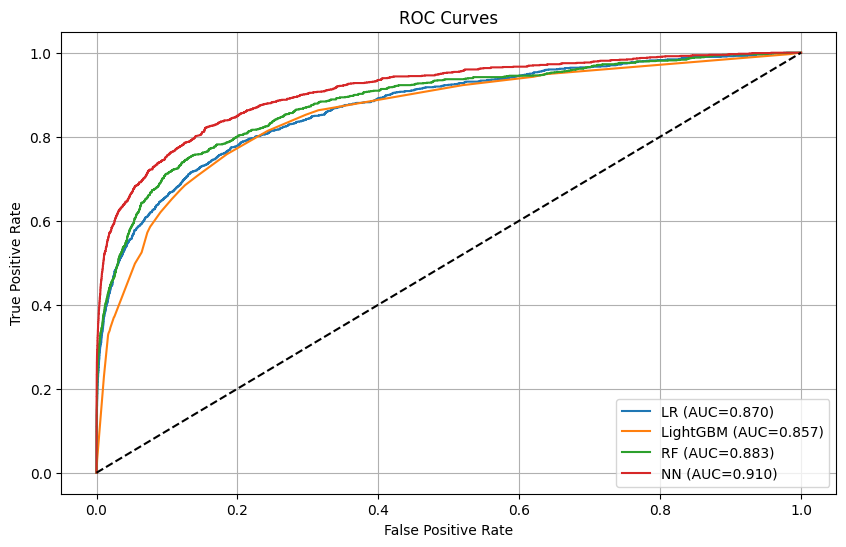

In [ ]:
# ROC Curves
plt.figure(figsize=(10, 6))

fpr_lr, tpr_lr, _ = roc_curve(y_val, y_val_proba_lr)
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_val_proba_lgb)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_val, y_val_pred_nn_proba)

plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={roc_auc_lr:.3f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={roc_auc_lgb:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={roc_auc_rf:.3f})')
plt.plot(fpr_nn, tpr_nn, label=f'NN (AUC={roc_auc_nn:.3f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

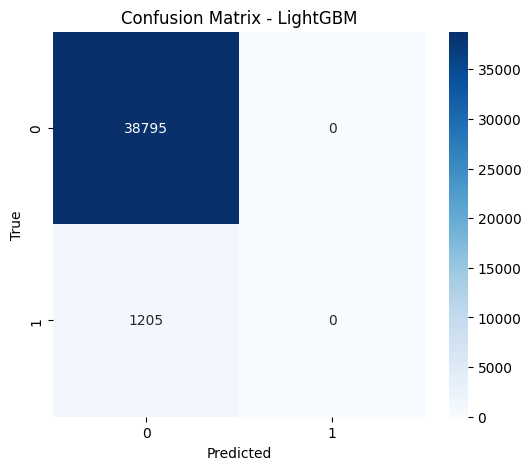

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_lgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## 11. Generate Submission

In [ ]:
# Use best model (LightGBM) for prediction
best_model = lgb_model
test_predictions = best_model.predict_proba(X_test)[:, 1]

# Create submission
submission = pd.DataFrame({
    'TransactionID': test_ids if test_ids is not None else range(len(test_predictions)),
    'isFraud': test_predictions
})

submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")
print(f"Shape: {submission.shape}")
print(f"\nFirst 10 rows:")
print(submission.head(10))

Submission file created: submission.csv
Shape: (100000, 2)

First 10 rows:
   TransactionID   isFraud
0        3663549  0.035176
1        3663550  0.041967
2        3663551  0.054392
3        3663552  0.041279
4        3663553  0.035176
5        3663554  0.035176
6        3663555  0.066592
7        3663556  0.058966
8        3663557  0.035176
9        3663558  0.054392


## 12. Summary

In [ ]:
print("=" * 60)
print("FRAUD DETECTION PROJECT SUMMARY")
print("=" * 60)

print(f"\nDataset:")
print(f"  Training samples: {len(train_df):,}")
print(f"  Test samples: {len(test_df):,}")
print(f"  Features: {X.shape[1]}")

print(f"\nModels Trained:")
print(f"  1. Logistic Regression")
print(f"  2. LightGBM")
print(f"  3. Random Forest")
print(f"  4. Neural Network")

print(f"\nBest Model: {results.iloc[0]['Model']}")
print(f"Best ROC-AUC: {results.iloc[0]['ROC-AUC']:.4f}")

print(f"\nDeliverables:")
print(f"  - submission.csv (predictions)")
print(f"  - Model comparison results")
print(f"  - Visualizations")

print("\n" + "=" * 60)
print("PROJECT COMPLETED")
print("=" * 60)

FRAUD DETECTION PROJECT SUMMARY

Dataset:
  Training samples: 200,000
  Test samples: 100,000
  Features: 392

Models Trained:
  1. Logistic Regression
  2. LightGBM
  3. Random Forest
  4. Neural Network

Best Model: Neural Network
Best ROC-AUC: 0.9103

Deliverables:
  - submission.csv (predictions)
  - Model comparison results
  - Visualizations

PROJECT COMPLETED
